<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/1-Simple_Random_Walk/Simple_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Random Walk

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-random-walk.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

###Summary
Two equally matched opponents are competing in a game in which changes in score occur often and in one point increments. (Imagine a basketball game in which every basket counts only one point.) We’ll use simulation to investigate the following questions.

1. Which is more likely: that one team leads for most of the game, or that the lead tends to change frequently over the course of the game?
2. When would you expect the largest lead (or deficit) to occur — near the beginning, the end, or in the middle of the game? (If the largest lead (or deficit) is attained at several points in the game, when you do expect it to first occur?)
3. When would you expect the last tie to occur — near the beginning, the end, or in the middle of the game?

###Hypothesis

1. I would think if the opponents are competitive, then that would lead to the frequent change of leads.
2. I think they could happen at any time. I don't think there would be a skew to one point of the game or another.
3. Again if it is competitive, I would think that the last tie would occur at the end of the game.

$A = \text{Team A score} \qquad B = \text{Team B score} \qquad n = \text{Total scores}$

$X_n = A-B \qquad \text{After first n scores}$

$X_0 = 0$

$2n = \text{steps} $

$T = \text{Last tie} \qquad L = \text{Total time A leads} \qquad M = \text{First time max differential} \qquad M_A = \text{First time max A lead} \qquad$

---

## Application

Write your own code to conduct and run a simulation to approximate the distribution of each of $T/(2n)$, $L/(2n)$, and $M/(2n)$ for $n=100$. Summarize the results with appropriate plots and summary statistics, and describe the distributions.


Using the [Symbulate](https://github.com/dlsun/symbulate) package and referencing their [documentation](https://dlsun.github.io/symbulate/index.html).

In [1]:
pip install symbulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.8 MB/s eta 0:00:00


In [2]:
from symbulate import *
%matplotlib inline

First lets look at a single simulation and resulting path.

In [3]:
#Setting up based on prompt
n = 100
steps = 2*n

#Following and modifying Random Processes section from symbulate documentation
P = Bernoulli(0.5)**steps
Z = RV(P)
A = RandomProcess(P, Naturals())
B = RandomProcess(P, Naturals())

A[0] =  0
B[0] =  0
for i in range(steps):
    if i%2 == 0:
      A[i+1] = A[i] + Z[i+1]  # Has possession - Possibility to score
      B[i+1] = B[i]           # Defense!
    else:
      A[i+1] = A[i]           # Defense!
      B[i+1] = B[i] + Z[i+1]  # Has possession - Possibility to score

#create process to show differential
X = A - B



In [4]:
#To see A score over time
#A.sim(1).plot(alpha = 1, tmin = 0, tmax = 100)

In [5]:
#To see B score over time
#B.sim(1).plot(alpha = 1, tmin = 0, tmax = 100)

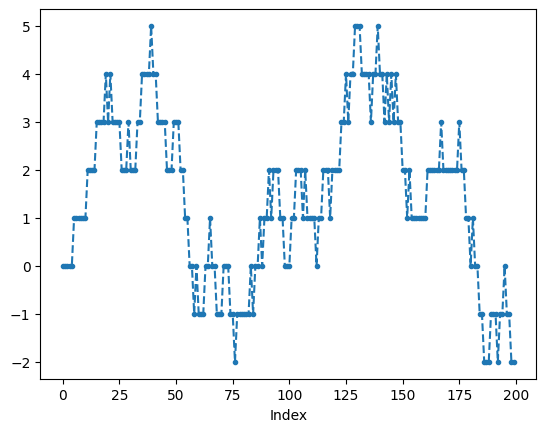

In [25]:
#To see A - B differential over time
games = X.sim(1)
games.plot(alpha = 1, tmin = 0, tmax = 200)

In [26]:
def last_tie(x):
    last_tie_index = 0
    for i in range(steps):
        if x[i] == 0:
            last_tie_index = i + 1
    return last_tie_index

tie = games.apply(last_tie).get(0)
msg = "The last tie was at step {}, {:.2f}% through the game.".format(tie, (tie/steps)*100)
print(msg)

The last tie was at step 196, 98.00% through the game.


In [27]:
def time_lead_A(x):
    time_lead = 0
    for i in range(steps):
        if x[i] > 0:
            time_lead += 1
    return time_lead

lead = games.apply(time_lead_A).get(0)
msg = "The total time team A held the lead was {} steps, {:.2f}% of the game.".format(lead,(lead/steps)*100)
print(msg)

The total time team A held the lead was 141 steps, 70.50% of the game.


In [28]:
def max(x):
    max_num = 0
    for i in range(steps):
        if abs(x[i]) > max_num:
              max_num = abs(x[i])
    return max_num

def maxa(x):
    max_num = 0
    for i in range(steps):
        if x[i] > max_num:
              max_num = x[i]
    return max_num

# diff_max = games.apply(max).get(0)
# msg = "The greatest differential in the game was {} points.".format(diff_max)
# print(msg)

In [29]:
def maxi(x):
    max_num = max(x)
    maxi = 0
    for i in range(steps):
      if abs(x[i]) == max_num:
            maxi = i + 1
            return maxi

diff_max = games.apply(max).get(0)
diff_maxi = games.apply(maxi).get(0)
msg = "The greatest differential in the game of {} occured at step {}, {:.2f}% through the game.".format(diff_max, diff_maxi, (diff_maxi/steps)*100)
print(msg)

The greatest differential in the game of 5 occured at step 40, 20.00% through the game.


In [30]:
def maxia(x):
    max_num = maxa(x)
    maxi = 0
    for i in range(steps):
      if x[i] == max_num:
            maxi = i + 1
            return maxi

diff_max_a = games.apply(maxa).get(0)
diff_maxi_a = games.apply(maxia).get(0)
msg = "The largest A lead differential in the game of {} occured at step {}, {:.2f}% through the game.".format(diff_max_a, diff_maxi_a, (diff_maxi_a/steps)*100)
print(msg)

The largest A lead differential in the game of 5 occured at step 40, 20.00% through the game.


Now lets increase the amount of paths and find the distributions of T, L, and M values.

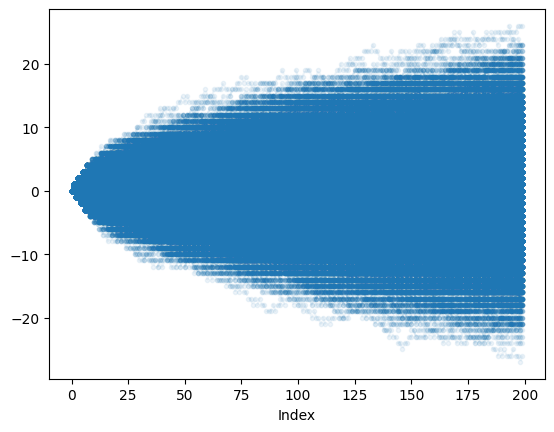

In [40]:
#To see multiple A - B differentials over time
games = X.sim(10000)
games.plot(tmin = 0, tmax = 200)

###Last Ties

In [41]:
#find last ties of the games
tie = games.apply(last_tie)

#normalize the ties to % progression of game
tie = tie/200

#tabulate distribution
tie.tabulate(normalize=True)

0.005,0.0275
0.01,0.0137
0.015,0.013
0.02,0.0106
0.025,0.0108
0.03,0.0079
0.035,0.0099
0.04,0.0072
0.045,0.0053
0.05,0.0076
0.055,0.0079


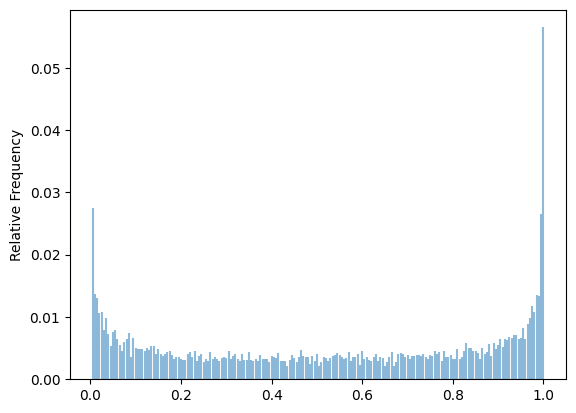

In [42]:
#plot distribution
tie.plot()

###Time A Lead

In [43]:
#find total time A lead
lead = games.apply(time_lead_A)

#normalize the lead to % progression of game
lead = lead/200

#tabulate distribution
lead.tabulate(normalize=True)

0.0,0.0551
0.005,0.0287
0.01,0.013
0.015,0.014
0.02,0.0098
0.025,0.0086
0.03,0.0081
0.035,0.0094
0.04,0.0086
0.045,0.0071
0.05,0.0067


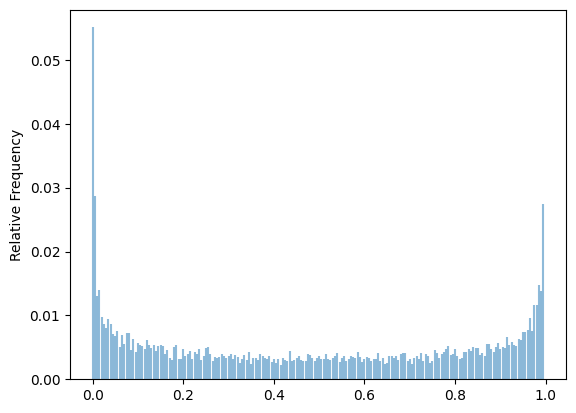

In [44]:
#plot distribution
lead.plot()

###First Max Lead

In [45]:
#find max and first time it occurs in game
maxdi = games.apply(maxi)

#normalize the ties to % progression of game
maxdi = maxdi/200

#tabulate distribution
maxdi.tabulate(normalize=True)

0.025,0.0001
0.03,0.0003
0.035,0.0003
0.04,0.0004
0.045,0.0003
0.05,0.0009
0.055,0.0006
0.06,0.0012
0.065,0.0008
0.07,0.0015
0.075,0.0006


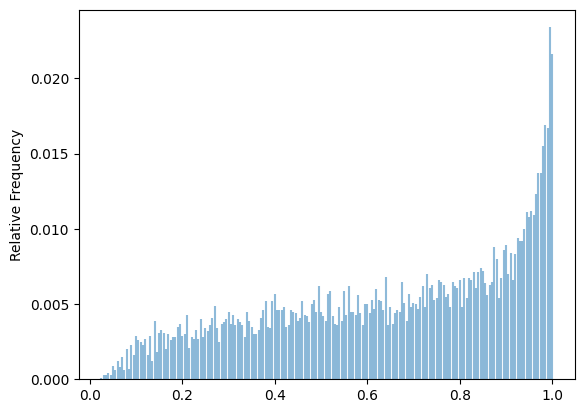

In [46]:
#plot distribution
maxdi.plot()

In [47]:
#find A's max and first time it occurs in game
maxdia = games.apply(maxia)

#normalize the ties to % progression of game
maxdia = maxdia/200

#tabulate distribution
maxdia.tabulate(normalize=True)

0.005,0.0551
0.01,0.0576
0.02,0.0245
0.03,0.019
0.04,0.0188
0.05,0.018
0.06,0.013
0.07,0.0137
0.08,0.0118
0.09,0.0114
0.1,0.0097


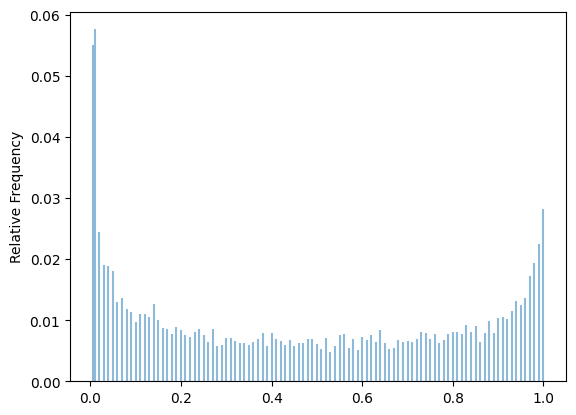

In [48]:
#plot distribution
maxdia.plot()

###Analysis and Conclusion

Consider the three questions at the start of this page; what do your simulation results suggest? Write a brief report summarizing your results and conclusions.

To reiterate the questions:
1. Which is more likely: that one team leads for most of the game, or that the lead tends to change frequently over the course of the game?
2. When would you expect the largest lead (or deficit) to occur — near the beginning, the end, or in the middle of the game? (If the largest lead (or deficit) is attained at several points in the game, when you do expect it to first occur?)
3. When would you expect the last tie to occur — near the beginning, the end, or in the middle of the game?

1. After conducting the simulation, I see now how even if the teams are competitive, there are situtations where a team can take the lead early and from then on the score differential is relatively constant but that entire time one team hold the lead. We can also see from the plot showing the many possible paths that the middle section of the paraboloid is the darkest which indicates to me most paths flow through or cross there many times. Therefore I think the probability of frequent lead changes or team leads for most of the game is more equally distributed, even if they are competitive.


2. From the "First Max Lead" plot we can see that the distribution is clearly skewed to the end of the game. I originally thought that the larges lead could occur at any point in a game and wouldn't be skewed. Although it *can* occur in any point in a game, we can see that many maxes occur later in the game. This also makes sense because if a team has and is holding a lead, the longer they keep playing, the more likely they keep adding to their score and increase the max deficit. If we only consider the max lead of team A, then this is a different story. From that distribution we can see that it is more likely that a max lead is either at the beginning or the end of the game.


3. Originally I thought that the last ties would occur at the end of the game. Referencing what is plotted in the "Last Ties" section, this seems to be true but it is only part of the story. There is also a significant spike of last ties that occur at the beginning of these games. I think is is also the situation where one team gets an early lead and then the rest of the game is competitive but this leads to infrequent ties or lead changes.